### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


In [2]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [1]:
!python -m pip install --upgrade scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

    100% |████████████████████████████████| 20.0MB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
The scikit-learn version is 0.24.2.


In [2]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# your code goes here

In [3]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

    100% |████████████████████████████████| 1.6MB 12.4MB/s ta 0:00:01


# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [4]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [5]:
# Load in the general demographics data.
dem_data = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')
# Load in the feature summary file.
dem_sum = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [1]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

#The following code blocks look at the data and help me to familiarize myself with the data a bit while ensuring that it has loaded correctly
dem_data.head(30)


NameError: name 'dem_data' is not defined

In [7]:
dem_data.shape

(891221, 85)

In [8]:
dem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [9]:
dem_sum.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
# Identify missing or unknown data values and convert them to NaNs.
# Replacing the -1 values with NaN
for i in dem_data[['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ','FINANZ_MINIMALIST', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'HEALTH_TYP', 'NATIONALITAET_KZ','PRAEGENDE_JUGENDJAHRE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'GEBAEUDETYP', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_BAUMAX', 'KBA05_GBZ','EWDICHTE', 'INNENSTADT', 'KKK', 'REGIOTYP', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB' ]].columns:
    dem_data[i].replace(-1,'NaN',inplace=True)


In [11]:
# Replacing 0 values with NaN
for i in dem_data[['AGER_TYP', 'ANREDE_KZ', 'ALTERSKATEGORIE_GROB', 'HEALTH_TYP', 'GEBURTSJAHR', 'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB','RETOURTYP_BK_S', 'ALTER_HH', 'ANZ_HAUSHALTE_AKTIV', 'MIN_GEBAEUDEJAHR', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'TITEL_KZ', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'GEBAEUDETYP', 'KBA05_BAUMAX', 'KBA05_GBZ', 'KKK', 'PLZ8_BAUMAX', 'ORTSGR_KLS9']].columns:
    dem_data[i].replace(0, "NaN", inplace=True)

In [12]:
# Replacing missing values marked as 9 with NaN
for i in dem_data[['ALTERSKATEGORIE_GROB', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP', 'RELAT_AB' ]].columns:
    dem_data[i].replace(-1,'NaN',inplace=True)

In [13]:
#Replacing X and XX as NaN
for i in dem_data[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']].columns:
    dem_data[i].replace('X','NaN',inplace=True)
for i in dem_data[['CAMEO_DEU_2015', ]].columns:
    dem_data[i].replace('XX','NaN',inplace=True)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [14]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

# looking for colomns with large values of missing data
dem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null object
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null object
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null object
LP_LEBENSPHASE_FEIN      886367 non-null object
LP_LEBENSPHASE_GROB      886367 non-null object
LP_FAMILIE_FEIN          886367 non-null object
LP_FAMILIE_GROB          886367 n

In [15]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Removing all columns with <790,000 values from the dataset
dem_data = dem_data.drop(['REGIOTYP', 'KBA13_ANZAHL_PKW', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX','PLZ8_HHZ', 'PLZ8_GBZ','KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_BAUMAX', 'KBA05_GBZ', 'KKK', 'MOBI_REGIO'], axis=1)


In [16]:
#Confirming all columns with <790,000 are removed
dem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 66 columns):
AGER_TYP                 891221 non-null object
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null object
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null object
LP_LEBENSPHASE_FEIN      886367 non-null object
LP_LEBENSPHASE_GROB      886367 non-null object
LP_FAMILIE_FEIN          886367 non-null object
LP_FAMILIE_GROB          886367 n

#### Discussion 1.1.2: Assess Missing Data in Each Column

Only one column had a drastic amount of missing values. That was the KK_KUNDENTYP column with only about 300,000 values in the dataset. I removed that one along with any columns that had less than 790,000 values. I chose this number as the cutoff because there are about 890,000 entries in this which means that all dropped columns will be missing around 100,000+ values. Most of these columns were data about entire buildings or neighborhoods rather than holding information about individuals. 

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

(array([1.00000e+02, 7.34990e+04, 0.00000e+00, 1.82730e+04, 1.27600e+03,
        5.70000e+01, 4.69700e+03, 4.80000e+01, 1.03380e+04, 7.82933e+05]),
 array([38. , 40.8, 43.6, 46.4, 49.2, 52. , 54.8, 57.6, 60.4, 63.2, 66. ]),
 <a list of 10 Patch objects>)

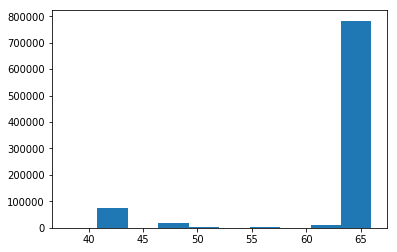

In [17]:
# How much data is missing in each row of the dataset?

#I used the following bar chart to identify how many values there are in the rows. I cn see that there are quite a few rows that have less than 60 values in them while the majority have 65 

missing_values = dem_data.apply(lambda x: x.count(), axis=1)
plt.hist(missing_values)

In [18]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

#It looks like a vast majority of the data contains 60 or more values per row so I will just use the rows that have 60+ values and drop the rows that have less than that.
missing_value_limit = 60
low_missing = missing_values[missing_values >= missing_value_limit]
high_missing = missing_values[missing_values < missing_value_limit]
dem_low_missing = dem_data.iloc[low_missing.index,:]
dem_high_missing = dem_data.iloc[high_missing.index,:]


(array([4.80000e+01, 4.00000e+00, 0.00000e+00, 1.77000e+02, 0.00000e+00,
        1.01570e+04, 4.00000e+00, 0.00000e+00, 3.74500e+03, 7.79184e+05]),
 array([60. , 60.6, 61.2, 61.8, 62.4, 63. , 63.6, 64.2, 64.8, 65.4, 66. ]),
 <a list of 10 Patch objects>)

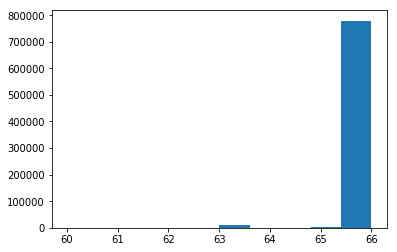

In [19]:
#checking that the data is now split correctly
check = dem_low_missing.apply(lambda x: x.count(), axis=1)
plt.hist(check)

(array([1.0000e+02, 0.0000e+00, 7.3499e+04, 0.0000e+00, 0.0000e+00,
        3.7200e+02, 1.9177e+04, 1.0000e+00, 5.6000e+01, 4.6970e+03]),
 array([38. , 39.8, 41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. ]),
 <a list of 10 Patch objects>)

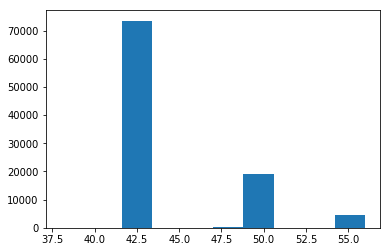

In [20]:
#looking at the spread for my rows with many missing values
check2 = dem_high_missing.apply(lambda x: x.count(), axis=1)
plt.hist(check2)

In [21]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
import matplotlib
import seaborn

def bar_plot(column, dataset):
    seaborn.countplot(x= column, data=dataset)

#I am looking at 4 different columns from dem_low_missing and dem_high_missing and comparing them to one another to see if there are major differences between the datasets

None


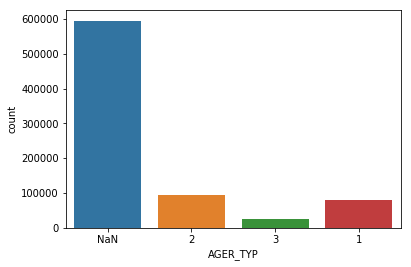

In [22]:
print(bar_plot('AGER_TYP', dem_low_missing))

None


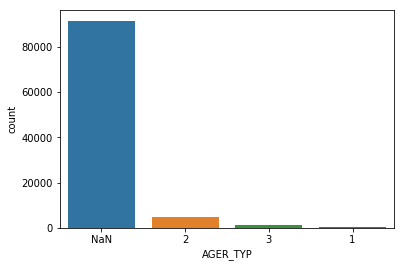

In [23]:
print(bar_plot('AGER_TYP', dem_high_missing))

None


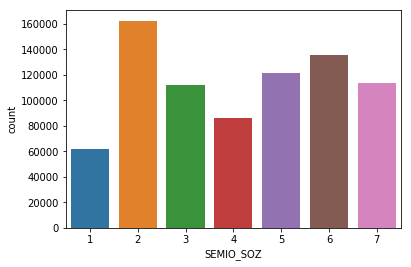

In [24]:
print(bar_plot('SEMIO_SOZ', dem_low_missing))

None


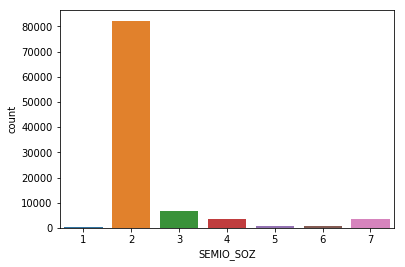

In [25]:
print(bar_plot('SEMIO_SOZ', dem_high_missing))

None


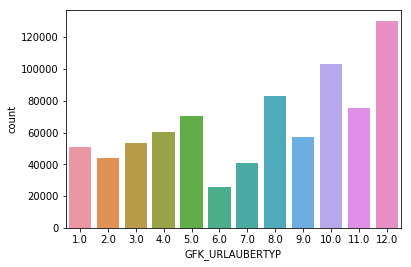

In [26]:
print(bar_plot('GFK_URLAUBERTYP', dem_low_missing))

None


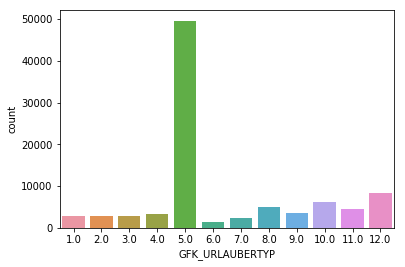

In [27]:
print(bar_plot('GFK_URLAUBERTYP', dem_high_missing))

None


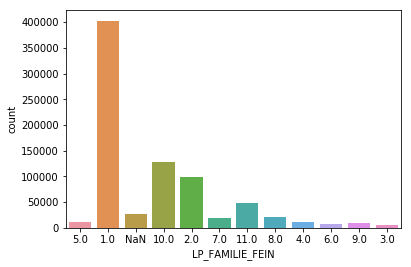

In [28]:
print(bar_plot('LP_FAMILIE_FEIN', dem_low_missing))

None


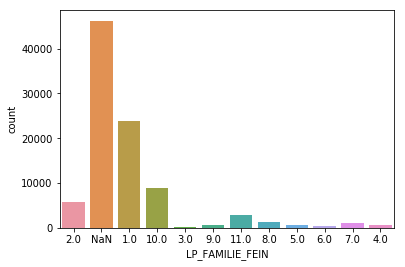

In [29]:
print(bar_plot('LP_FAMILIE_FEIN', dem_high_missing))

None


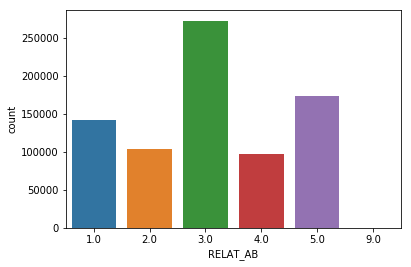

In [30]:
print(bar_plot('RELAT_AB', dem_low_missing))

None


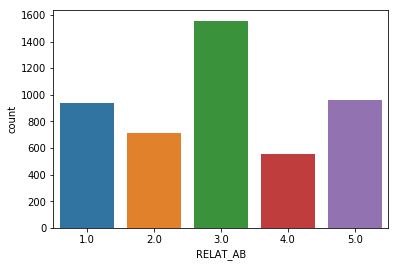

In [31]:
print(bar_plot('RELAT_AB', dem_high_missing))

#### Discussion 1.1.3: Assess Missing Data in Each Row

I noticed that for SEMIO_SOZ and GFK_URLAUBERTYP, there is quite a difference in how the data is distributed. In SEMIO_SOZ, 2 has a much higher value in the high_missing dataset when compared with the low_missing dataset. For GFK_URLAUBERTYP, 5.0 had a very high value count while all other numbers were fairly even in the high_missing dataset while the low missing dataset had a different trend where 5.0 was more even with the numbers around it and there was a trend in increasing value counts for higher numbers. The other 3 columns that were looked at seemed to have a very similar spread for both datasets.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [22]:
# How many features are there of each data type?
dem_sum['type'].value_counts()


ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [23]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

#OST_WEST_KZ takes O or W for East or West

#Binary(Leave as is): ANREDE_KZ, GREEN_AVANTGARDE, SOHO_KZ, VERS_TYP,

#Dummy needed: AGER_TYP, CJT_GESAMTTYP, FINANZTYP, GFK_URLAUBERTYP,,LP_FAMILIE_FEIN, LP_FAMILIE_GROB,LP_STATUS_FEIN, LP_STATUS_GROB, NATIONALITAET_KZ, SHOPPER_TYP, TITEL_KZ, ZABEOTYP, GEBAEUDETYP,CAMEO_DEUG_2015, CAMEO_DEU_2015    

In [24]:
# Re-encode categorical variable(s) to be kept in the analysis.

columns_list =['AGER_TYP', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP','LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']

# getting dummies for the columns that need it
for i in columns_list:
    dem_low_missing[i] = pd.get_dummies(dem_low_missing[i])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
#OST_WEST_KZ takes O or W for East or West, converting that to O=0 and W=1
dem_low_missing['OST_WEST_KZ'] = dem_low_missing['OST_WEST_KZ'].map({'O':0,'W':1})
dem_low_missing.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,ONLINE_AFFINITAET,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,0,1,2,0,1,5,2,5,4,5,1,1996,0,0,3,21,6,0,0,0,1,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,0,1.0,0,2,0,NaN,2.0,0.0,6.0,9.0,11,0.0,0,1.0,1992.0,1,4.0,0,0,51,6.0,3.0,8.0,3.0,3.0,3.0,5,4.0
2,0,3,2,0,1,4,1,2,3,5,1,1979,0,1,3,3,1,1,1,0,0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0,0.0,0,1,0,17,1.0,0.0,4.0,9.0,10,0.0,1,5.0,1992.0,1,2.0,0,0,24,2.0,4.0,4.0,4.0,2.0,3.0,5,2.0
3,0,4,2,0,4,2,5,2,1,2,0,1957,1,0,2,NaN,NaN,0,0,0,0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0,0.0,0,1,0,13,0.0,0.0,1.0,9.0,1,0.0,1,4.0,1997.0,1,7.0,0,0,12,4.0,2.0,6.0,4.0,1.0,2.0,3,3.0
4,0,3,1,0,4,3,4,1,3,2,0,1963,0,0,3,32,10,0,0,0,0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0,0.0,0,2,0,20,4.0,0.0,5.0,9.0,3,0.0,1,4.0,1992.0,1,3.0,0,0,43,2.0,5.0,1.0,5.0,5.0,4.0,6,5.0
5,0,1,2,0,3,1,5,2,2,5,0,1943,1,0,3,8,2,1,1,0,0,1,3,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,1,0.0,0,2,0,10,1.0,0.0,5.0,9.0,5,0.0,1,5.0,1992.0,1,7.0,0,0,54,6.0,2.0,7.0,4.0,1.0,2.0,3,3.0


#### Discussion 1.2.1: Re-Encode Categorical Features

I decided to keep all of the categorical colums due to them potentially containing valuable information for our work. I needed to change the OST_WEST_KZ column to have O=0 and W=1 in order for us to do our later work. I also used one hot encoding to get dummies for the other columns in the categorical type. The only ones that were okay to leave as is because they were already utilizing a binary were: ANREDE_KZ, GREEN_AVANTGARDE, SOHO_KZ, and VERS_TYP.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [26]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

#renaming the various answers into simple numerical answers and splitting them up my movement and year
movement = []
year = []

for val in dem_low_missing['PRAEGENDE_JUGENDJAHRE']:
    if val in [1, 3, 5, 8, 10, 12, 14]:
        movement.append(0)
    elif val in [2, 4, 6, 7, 9, 11, 13, 15]:
        movement.append(1)
    else:
        movement.append(np.NaN)
    
    if val in [1, 2,]:
        year.append(4)
    elif val in [3, 4]:
        year.append(5)
    elif val in [5, 6, 7]:
        year.append(6)
    elif val in [8, 9]:
        year.append(7)
    elif val in [10, 11, 12, 13, 14]:
        year.append(8)
    elif val in [14, 15]:
        year.append(9)
    else:
        year.append(np.NaN)


In [27]:
# adding the year and movement values into their own columns in dem_low_missing
dem_low_missing['movement'] = movement
dem_low_missing['year'] = year
dem_low_missing.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,ONLINE_AFFINITAET,ARBEIT,ORTSGR_KLS9,RELAT_AB,movement,year
1,0,1,2,0,1,5,2,5,4,5,1,1996,0,0,3,21,6,0,0,0,1,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,0,1.0,0,2,0,NaN,2.0,0.0,6.0,9.0,11,0.0,0,1.0,1992.0,1,4.0,0,0,51,6.0,3.0,8.0,3.0,3.0,3.0,5,4.0,0.0,8.0
2,0,3,2,0,1,4,1,2,3,5,1,1979,0,1,3,3,1,1,1,0,0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0,0.0,0,1,0,17,1.0,0.0,4.0,9.0,10,0.0,1,5.0,1992.0,1,2.0,0,0,24,2.0,4.0,4.0,4.0,2.0,3.0,5,2.0,1.0,9.0
3,0,4,2,0,4,2,5,2,1,2,0,1957,1,0,2,NaN,NaN,0,0,0,0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0,0.0,0,1,0,13,0.0,0.0,1.0,9.0,1,0.0,1,4.0,1997.0,1,7.0,0,0,12,4.0,2.0,6.0,4.0,1.0,2.0,3,3.0,0.0,7.0
4,0,3,1,0,4,3,4,1,3,2,0,1963,0,0,3,32,10,0,0,0,0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0,0.0,0,2,0,20,4.0,0.0,5.0,9.0,3,0.0,1,4.0,1992.0,1,3.0,0,0,43,2.0,5.0,1.0,5.0,5.0,4.0,6,5.0,0.0,7.0
5,0,1,2,0,3,1,5,2,2,5,0,1943,1,0,3,8,2,1,1,0,0,1,3,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,1,0.0,0,2,0,10,1.0,0.0,5.0,9.0,5,0.0,1,5.0,1992.0,1,7.0,0,0,54,6.0,2.0,7.0,4.0,1.0,2.0,3,3.0,0.0,5.0


In [28]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

#creating lists for wealth and life stage so that I can put the info as numbers into dem_low_missing
wealth = []
life_stage = []
for val in dem_low_missing['CAMEO_INTL_2015']:
    try:
        val = int(val)
        if 10 < val < 16:
            wealth.append(0)
        elif 20 < val < 26:
            wealth.append(1)
        elif 30 < val < 36:
            wealth.append(2)
        elif 40 < val < 46:
            wealth.append(3)
        elif 50 < val < 56:
            wealth.append(4)
        else:
            wealth.append(np.NaN)
    except:
            wealth.append(np.NaN)
        
for val in dem_low_missing['CAMEO_INTL_2015']:
    try:
        val = int(val)
        if int(val % 10) == 1:
            life_stage.append(0)
        elif int(val % 10) == 2:
            life_stage.append(1)
        elif int(val % 10) == 3:
            life_stage.append(2)
        elif int(val % 10) == 4:
            life_stage.append(3)
        elif int(val % 10) == 5:
            life_stage.append(4)
        else:
            life_stage.append(np.NaN)
        
    except:
        life_stage.append(np.NaN)


In [29]:
#Creating new columns for life_stage and wealth
dem_low_missing['life_stage'] = life_stage
dem_low_missing['wealth'] = wealth

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# dropping the old columns since the info has been re-engineered into the new columns
dem_low_missing.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
#Dropping other mixed columns, KBA05_BAUMAX and  PLZ8_BAUMAX were dropped in a previous step
dem_low_missing.drop(['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB', 'WOHNLAGE'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

I kept 'CAMEO_INTL_2015' and 'PRAEGENDE_JUGENDJAHRE' as columns because I do beleive they have interesting information that may help us on our analysis. I made 4 new columns for the dem_low_missing dataframe in this portion of the project. For 'CAMEO_INTL_2015', I added 2 columns describing a family's life_stage and wealth. For 'PRAEGENDE_JUGENDJAHRE', I added two columns describing movement and year.

I decided to drop 'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB', and'WOHNLAGE' from the dataframe to lessen the steps needed to clean the data. 'LP_LEBENSPHASE_FEIN', and 'LP_LEBENSPHASE_GROB' give us the same sort of info as CAME_INTL_2015 did so it felt somewhat repetitive and 'WOHNLAGE' describes neighborhood which I am focusing less on due to the missing values in many of the neightborhood and building columns. 

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [32]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

#checking that all columns are giving expected values
dem_low_missing. head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,ONLINE_AFFINITAET,ARBEIT,ORTSGR_KLS9,RELAT_AB,movement,year,life_stage,wealth
1,0,1,2,0,1,5,2,5,4,5,1,1996,0,0,3,0,0,0,1,1,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,0,1.0,0,2,0,NaN,2.0,0.0,6.0,9.0,11,0.0,0,1.0,1992.0,1,0,0,6.0,3.0,8.0,3.0,3.0,3.0,5,4.0,0.0,8.0,0.0,4.0
2,0,3,2,0,1,4,1,2,3,5,1,1979,0,1,3,1,1,0,0,1,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0,0.0,0,1,0,17,1.0,0.0,4.0,9.0,10,0.0,1,5.0,1992.0,1,0,0,2.0,4.0,4.0,4.0,2.0,3.0,5,2.0,1.0,9.0,3.0,1.0
3,0,4,2,0,4,2,5,2,1,2,0,1957,1,0,2,0,0,0,0,1,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0,0.0,0,1,0,13,0.0,0.0,1.0,9.0,1,0.0,1,4.0,1997.0,1,0,0,4.0,2.0,6.0,4.0,1.0,2.0,3,3.0,0.0,7.0,1.0,0.0
4,0,3,1,0,4,3,4,1,3,2,0,1963,0,0,3,0,0,0,0,1,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0,0.0,0,2,0,20,4.0,0.0,5.0,9.0,3,0.0,1,4.0,1992.0,1,0,0,2.0,5.0,1.0,5.0,5.0,4.0,6,5.0,0.0,7.0,2.0,3.0
5,0,1,2,0,3,1,5,2,2,5,0,1943,1,0,3,1,1,0,0,1,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,1,0.0,0,2,0,10,1.0,0.0,5.0,9.0,5,0.0,1,5.0,1992.0,1,0,0,6.0,2.0,7.0,4.0,1.0,2.0,3,3.0,0.0,5.0,3.0,4.0


In [33]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
dem_clean_columns = dem_low_missing.keys().tolist()


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [34]:
# function that will duplicate all the work done to clean and organize the data. This will be used to clean and organize the customer data later.
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for i in df[['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ','FINANZ_MINIMALIST', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'HEALTH_TYP', 'NATIONALITAET_KZ','PRAEGENDE_JUGENDJAHRE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'GEBAEUDETYP', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_BAUMAX', 'KBA05_GBZ','EWDICHTE', 'INNENSTADT', 'KKK', 'REGIOTYP', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB' ]].columns:
        df[i].replace(-1,'NaN',inplace=True)
    
    for i in df[['AGER_TYP', 'ANREDE_KZ', 'ALTERSKATEGORIE_GROB', 'HEALTH_TYP', 'GEBURTSJAHR', 'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB','RETOURTYP_BK_S', 'ALTER_HH', 'ANZ_HAUSHALTE_AKTIV', 'MIN_GEBAEUDEJAHR', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'TITEL_KZ', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'GEBAEUDETYP', 'KBA05_BAUMAX', 'KBA05_GBZ', 'KKK', 'PLZ8_BAUMAX', 'ORTSGR_KLS9']].columns:
        df[i].replace(0, "NaN", inplace=True)
    
    for i in df[['ALTERSKATEGORIE_GROB', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP', 'RELAT_AB' ]].columns:
        df[i].replace(-1,'NaN',inplace=True)
    
    for i in df[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']].columns:
        df[i].replace('X','NaN',inplace=True)
    for i in df[['CAMEO_DEU_2015', ]].columns:
        df[i].replace('XX','NaN',inplace=True)

    
    # remove selected columns and rows, ...
    df = df.drop(['REGIOTYP', 'KBA13_ANZAHL_PKW', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX','PLZ8_HHZ', 'PLZ8_GBZ','KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_BAUMAX', 'KBA05_GBZ', 'KKK', 'MOBI_REGIO'], axis=1)

    
    # select, re-encode, and engineer column values.
    columns_list =['AGER_TYP', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP','LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']

    for i in columns_list:
        df[i] = pd.get_dummies(df[i])
    df['OST_WEST_KZ'] = df['OST_WEST_KZ'].map({'O':0,'W':1})
    
    movement = []
    year = []

    for val in df['PRAEGENDE_JUGENDJAHRE']:
        if val in [1, 3, 5, 8, 10, 12, 14]:
            movement.append(0)
        elif val in [2, 4, 6, 7, 9, 11, 13, 15]:
            movement.append(1)
        else:
            movement.append(np.NaN)

        if val in [1, 2,]:
            year.append(4)
        elif val in [3, 4]:
            year.append(5)
        elif val in [5, 6, 7]:
            year.append(6)
        elif val in [8, 9]:
            year.append(7)
        elif val in [10, 11, 12, 13, 14]:
            year.append(8)
        elif val in [14, 15]:
            year.append(9)
        else:
            year.append(np.NaN)
        
    df['movement'] = movement
    df['year'] = year
    
    wealth = []
    life_stage = []
    for val in df['CAMEO_INTL_2015']:
        try:
            val = int(val)
            if 10 < val < 16:
                wealth.append(0)
            elif 20 < val < 26:
                wealth.append(1)
            elif 30 < val < 36:
                wealth.append(2)
            elif 40 < val < 46:
                wealth.append(3)
            elif 50 < val < 56:
                wealth.append(4)
            else:
                wealth.append(np.NaN)
        except:
                wealth.append(np.NaN)
        
    for val in df['CAMEO_INTL_2015']:
        try:
            val = int(val)
            if int(val % 10) == 1:
                life_stage.append(0)
            elif int(val % 10) == 2:
                life_stage.append(1)
            elif int(val % 10) == 3:
                life_stage.append(2)
            elif int(val % 10) == 4:
                life_stage.append(3)
            elif int(val % 10) == 5:
                life_stage.append(4)
            else:
                life_stage.append(np.NaN)

        except:
            life_stage.append(np.NaN)
    df['life_stage'] = life_stage
    df['wealth'] = wealth
    df.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)
    df.drop(['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB', 'WOHNLAGE'],axis=1,inplace=True)
    # Return the cleaned dataframe.
    return df
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [35]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

#using SimpleImputer to clean the dem_low_missing dataframe by replacing NaN missing values in dem_low_missing with the median value 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(dem_low_missing)

dem_clean = imputer.transform(dem_low_missing)

In [36]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dem_clean = scaler.fit_transform(dem_clean)


### Discussion 2.1: Apply Feature Scaling

I used SimpleImputer to replace the missing values in the dem_low_missing dataframe with the median value for the column and making that into a new dataframe, dem_clean. This will allow me to use the Standard scaler to apply feature scaling to my clean data, dem_clean.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [38]:
from sklearn.decomposition import PCA
dem_clean.shape

(793319, 65)

In [48]:
# Apply PCA to the data.
pca = PCA(40)
X_pca = pca.fit_transform(dem_clean)

In [49]:
# Investigate the variance accounted for by each principal component.

pca.explained_variance_ratio_.sum()

0.9244396649533106

In [50]:
pca = PCA(38)
X_pca = pca.fit_transform(dem_clean)
pca.explained_variance_ratio_.sum()

    

    
    

KeyboardInterrupt: 

In [ ]:
pca = PCA(36)
X_pca = pca.fit_transform(dem_clean)
pca.explained_variance_ratio_.sum()

In [51]:
pca = PCA(34)
X_pca = pca.fit_transform(dem_clean)
pca.explained_variance_ratio_.sum()

0.8866848940384472

In [39]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(36)
X_pca = pca.fit_transform(dem_clean)
pca.explained_variance_ratio_.sum()

0.9002415596226396

### Discussion 2.2: Perform Dimensionality Reduction

I will be retaining 36 of the 65 components for the next step of analysis. After looking at a few different values ranging from 40 down to 34, 36 components kept the explained variance above 90% while minimizing the amount of components needed for analysis.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [40]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def map_weights(pca, i):
    df = pd.DataFrame(pca.components_, columns=dem_clean_columns)

    # Return a concatenated DataFrame
    return df.iloc[i].sort_values(ascending = False)

map_weights(pca, 0)


FINANZ_SPARER            0.276586
SEMIO_REL                0.242898
year                     0.239601
SEMIO_PFLICHT            0.238999
FINANZ_UNAUFFAELLIGER    0.224859
SEMIO_TRADV              0.221671
GEBURTSJAHR              0.214209
FINANZ_ANLEGER           0.212019
SEMIO_RAT                0.195120
FINANZTYP                0.193053
ALTER_HH                 0.177204
SEMIO_KULT               0.176604
SEMIO_FAM                0.154898
SEMIO_MAT                0.154026
LP_STATUS_GROB           0.111257
ONLINE_AFFINITAET        0.094581
HH_EINKOMMEN_SCORE       0.086501
SEMIO_SOZ                0.075624
wealth                   0.069366
HEALTH_TYP               0.062472
ORTSGR_KLS9              0.053930
EWDICHTE                 0.052175
ANZ_HAUSHALTE_AKTIV      0.037402
ARBEIT                   0.035311
RELAT_AB                 0.034708
SHOPPER_TYP              0.029918
FINANZ_HAUSBAUER         0.019158
LP_FAMILIE_GROB          0.015334
LP_FAMILIE_FEIN          0.015334
GFK_URLAUBERTY

In [41]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weights(pca, 1)

LP_STATUS_GROB           0.231650
FINANZ_HAUSBAUER         0.230514
HH_EINKOMMEN_SCORE       0.228590
SEMIO_KAEM               0.213335
wealth                   0.207795
ORTSGR_KLS9              0.197392
EWDICHTE                 0.195701
LP_STATUS_FEIN           0.184947
ANREDE_KZ                0.184335
SEMIO_KRIT               0.176369
SEMIO_DOM                0.168764
ARBEIT                   0.149003
ANZ_HAUSHALTE_AKTIV      0.145863
SEMIO_ERL                0.141797
RELAT_AB                 0.140475
LP_FAMILIE_FEIN          0.136455
LP_FAMILIE_GROB          0.136455
FINANZTYP                0.083296
RETOURTYP_BK_S           0.057979
VERS_TYP                 0.051054
ANZ_HH_TITEL             0.044005
SEMIO_RAT                0.043749
ALTERSKATEGORIE_GROB     0.038535
SEMIO_LUST               0.035238
FINANZ_VORSORGER         0.019335
CJT_GESAMTTYP            0.017772
FINANZ_SPARER            0.010628
HEALTH_TYP               0.000928
TITEL_KZ                -0.003167
SOHO_KZ       

In [42]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weights(pca, 2)

SEMIO_VERT               0.280490
SEMIO_SOZ                0.244121
SEMIO_FAM                0.241924
SEMIO_KULT               0.222437
LP_STATUS_FEIN           0.153805
ORTSGR_KLS9              0.149548
EWDICHTE                 0.146507
wealth                   0.140034
RETOURTYP_BK_S           0.122570
ARBEIT                   0.115665
LP_STATUS_GROB           0.111607
HH_EINKOMMEN_SCORE       0.108306
RELAT_AB                 0.105539
ANZ_HAUSHALTE_AKTIV      0.102859
SHOPPER_TYP              0.101111
LP_FAMILIE_FEIN          0.091599
LP_FAMILIE_GROB          0.091599
SEMIO_REL                0.087188
FINANZ_VORSORGER         0.075544
FINANZ_HAUSBAUER         0.067054
SEMIO_MAT                0.065202
SEMIO_LUST               0.046446
ALTERSKATEGORIE_GROB     0.045304
FINANZ_MINIMALIST        0.040336
CJT_GESAMTTYP            0.036609
ANZ_HH_TITEL             0.034892
VERS_TYP                 0.026654
AGER_TYP                 0.023972
ZABEOTYP                 0.018256
TITEL_KZ      

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

For the first component, the top 5 columns are: 
- FINANZ_SPARER            0.276586
- SEMIO_REL                0.242898
- year                     0.239601
- SEMIO_PFLICHT            0.238999
- FINANZ_UNAUFFAELLIGER    0.224859
and the highest negative values at the bottom of the list are:
- ALTERSKATEGORIE_GROB    -0.248461
- FINANZ_VORSORGER        -0.248913

For the second component, the top 5 columns are: 
- LP_STATUS_GROB           0.231650
- FINANZ_HAUSBAUER         0.230514
- HH_EINKOMMEN_SCORE       0.228590
- SEMIO_KAEM               0.213335
- wealth                   0.207795
and the highest negative values at the bottom of the list are:
- SEMIO_VERT              -0.196211
- FINANZ_MINIMALIST       -0.202077

For the third component, the top 5 columns are:
- SEMIO_VERT               0.280490
- SEMIO_SOZ                0.244121
- SEMIO_FAM                0.241924
- SEMIO_KULT               0.222437
- LP_STATUS_FEIN           0.153805
and the highest negative values at the bottom of the list are:
- SEMIO_KAEM              -0.273711
- ANREDE_KZ               -0.320043

After looking at the lowest and highest values from these 3 components, that both FINANZ and SEMIO columns are showing up very frequently. We can assume that these columns are important for our purposes of using this information to predict who could be potential new customers. SEMIO describes a person's mindsets and attitudes while FINANZTYP describes how a person spends their money. These columns seem to explain a lot of variance in the data and will be important.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [43]:
from sklearn.cluster import KMeans

In [57]:
# Over a number of different cluster counts...
n_clusters_list = [3, 7, 10, 15, 20]
scores = []

    # run k-means clustering on the data and...
for num in n_clusters_list:
    kmeans = KMeans(n_clusters=num)
    kmeans.fit_predict(X_pca)
    # compute the average within-cluster distances.
    scores.append(kmeans.score(X_pca))
    print(scores)

KeyboardInterrupt: 

In [ ]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
import matplotlib.pyplot as plt
abs_scores = []
for num in scores:
    result = abs(num)
    abs_scores.append(result)
    
plt.plot(n_clusters_list, abs_scores, marker="o")


Looking at the plot above, it looks like the distance reduction starts to drop off towards the right side of the plot, with about 15 clusters so I will pick 15 clusters as the KMeans model I will use. 

In [44]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
final_kmeans = KMeans(15)
gen_preds = final_kmeans.fit_predict(X_pca)

### Discussion 3.1: Apply Clustering to General Population

After testing with 5 different cluster amounts ranging from 3 to 20 and plotting the results, the reduction in distance from increasing the amount of clusters drops off around 15 clusters. I decided to use this number as the number of clusters for my model moving forward. I think it gives us a good amount of reduction in distance without having the diminishing returns that increasing the number of clusters would result in. 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [45]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [46]:
#ensuring the data loaded correctly
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,2,0,4.0,1,1,20.0,5.0,2.0,2.0,10.0,5.0,1,4,5.0,6,5,2,6,6,7,3,4,1,3,1,1,2,1,3,0.0,0.0,1,3,10.0,2.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,1.0,5.0,1992.0,W,7.0,1,1A,13,2.0,2.0,0.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,2,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,3,6,2,6,7,5,3,4,1,3,3,2,4,1,3,0.0,0.0,1,3,11.0,3.0,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,2,0,3.0,1,2,13.0,3.0,1.0,1.0,10.0,5.0,1,4,5.0,2,2,1,3,3,7,7,1,2,7,5,6,4,1,1,0.0,0.0,2,3,6.0,1.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,8.0,1.0,1992.0,W,2.0,5,5D,34,2.0,2.0,0.0,0.0,0.0,3.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,7.0,433.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,6,0,10.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,1,3.0,6,5,3,4,7,5,3,4,3,3,3,3,3,4,0,0.0,0.0,1,1,8.0,0.0,0.0,4.0,NaN,NaN,9.0,0.0,NaN,2.0,2.0,1992.0,W,7.0,4,4C,24,3.0,0.0,0.0,0.0,1.0,4.0,7.0,1.0,7.0,4.0,3.0,4.0,2.0,6.0,755.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,2,1960,2.0,0,3,31.0,10.0,10.0,5.0,1.0,1.0,1,8,5.0,4,5,4,6,5,6,4,5,5,3,5,2,5,4,1,0.0,0.0,2,1,20.0,4.0,0.0,6.0,2.0,2.0,9.0,7.0,0.0,3.0,1.0,1992.0,W,3.0,7,7B,41,0.0,3.0,2.0,0.0,0.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,7.0,513.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [47]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

#cleaning, imputing, and then scaling the data
customer_cleaned = clean_data(customers)
customer_cleaned = imputer.transform(customer_cleaned)
customer_final = scaler.transform(customer_cleaned)

In [48]:
# getting predictions for the data using the PCA(36) that I used on the general population data
X_cust_pca = pca.transform(customer_final)
cust_preds = final_kmeans.predict(X_cust_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [49]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

gen_preds_df = pd.DataFrame(gen_preds, columns =['gen_preds'])
cust_preds_df=pd.DataFrame(cust_preds, columns=['cust_preds'])

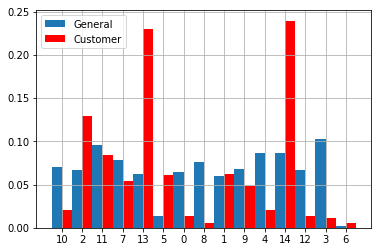

In [50]:
# code for bar graph used from Udacity Knowledge Q and A:https://knowledge.udacity.com/questions/905904

from collections import Counter

# generating proportion for the customer clusters.
labels, values = zip(*Counter(cust_preds).items())
v=list(values)
v[:] = [x/len(cust_preds) for x in v]
indexes = np.arange(len(labels))

# generating proportion for the azdias clusters.
labels1, values1 = zip(*Counter(gen_preds).items())
v1=list(values1)
v1[:] = [x/len(gen_preds) for x in v1]
indexes1 = np.arange(len(labels))

# configuring the graph
width = .5
plt.bar(indexes1, v1, width ,label='General')
plt.bar(indexes+width, v, width,  color='r' , label='Customer')
plt.xticks(indexes + width * 0.5, labels)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [88]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

#13 and 14 are very overrepresented in the customer data so I will be looking at those dimensions
#Looking at 13 first
dimension = final_kmeans.cluster_centers_[13]
dimension_df = pd.DataFrame(dimension,columns=['pca_weights'])
dimension_df.reindex(dimension_df.abs().sort_values(by='pca_weights',ascending=False).index).head()

,pca_weights
1,-3.187688
0,-2.320204
3,2.191200
2,1.515514
10,-0.674096


In [89]:
#Looking at the names for pca 1 which is negatively influencing the cluster
map_weights(pca, 1)

LP_STATUS_GROB           0.231650
FINANZ_HAUSBAUER         0.230514
HH_EINKOMMEN_SCORE       0.228590
SEMIO_KAEM               0.213335
wealth                   0.207795
ORTSGR_KLS9              0.197392
EWDICHTE                 0.195701
LP_STATUS_FEIN           0.184947
ANREDE_KZ                0.184335
SEMIO_KRIT               0.176369
SEMIO_DOM                0.168764
ARBEIT                   0.149003
ANZ_HAUSHALTE_AKTIV      0.145863
SEMIO_ERL                0.141797
RELAT_AB                 0.140475
LP_FAMILIE_FEIN          0.136455
LP_FAMILIE_GROB          0.136455
FINANZTYP                0.083296
RETOURTYP_BK_S           0.057979
VERS_TYP                 0.051054
ANZ_HH_TITEL             0.044005
SEMIO_RAT                0.043749
ALTERSKATEGORIE_GROB     0.038535
SEMIO_LUST               0.035238
FINANZ_VORSORGER         0.019335
CJT_GESAMTTYP            0.017772
FINANZ_SPARER            0.010628
HEALTH_TYP               0.000928
TITEL_KZ                -0.003167
SOHO_KZ       

In [90]:
#Looking at pca 3 which is positively influencing this cluster
map_weights(pca, 3)

GREEN_AVANTGARDE         0.363036
movement                 0.363036
EWDICHTE                 0.317656
ORTSGR_KLS9              0.316552
ANZ_PERSONEN             0.175397
ONLINE_AFFINITAET        0.154628
RELAT_AB                 0.152687
CAMEO_DEUG_2015          0.145140
ARBEIT                   0.128149
ZABEOTYP                 0.109025
SEMIO_DOM                0.099595
SEMIO_KAEM               0.095210
CAMEO_DEU_2015           0.078157
OST_WEST_KZ              0.073571
ANZ_TITEL                0.067684
ALTER_HH                 0.065053
year                     0.063734
TITEL_KZ                 0.054142
FINANZ_MINIMALIST        0.051345
ANZ_HH_TITEL             0.050968
FINANZ_UNAUFFAELLIGER    0.046574
WOHNDAUER_2008           0.038908
VERS_TYP                 0.036785
life_stage               0.032746
ANREDE_KZ                0.030248
SEMIO_RAT                0.026099
SEMIO_TRADV              0.022145
GEBURTSJAHR              0.021577
SEMIO_LUST               0.018721
RETOURTYP_BK_S

PC 1 is negatively influencing cluster 13 

Positively explains:
- LP_STATUS_GROB           0.231650
- FINANZ_HAUSBAUER         0.230514

Negatively explains

- SEMIO_VERT              -0.196211
- FINANZ_MINIMALIST       -0.202077

Our customers are not minimalist spenders or dreamful (self-described) people
They are housebuyers which may mean that they are older and more financially stable.


PC 3 is positively influencing cluster 13


Positively explains:
- GREEN_AVANTGARDE         0.363036
- movement                 0.363036


Negatively explains
- INNENSTADT              -0.280309
- BALLRAUM                -0.284482

Many customers are interested in environmental sustainability and other movements.
It doesn't seem to matter where they live in relation to cities according to the negative features.

In [93]:
#Loooking at cluster 14, we can see that 0 and 2 have the strongest influence so I will look at those.
dimension = final_kmeans.cluster_centers_[14]
dimension_df = pd.DataFrame(dimension,columns=['pca_weights'])
dimension_df.reindex(dimension_df.abs().sort_values(by='pca_weights',ascending=False).index).head()

,pca_weights
0,3.313178
2,-2.670766
3,-1.455215
6,-0.547748
1,0.536765


In [94]:
#Looking at pca 0 which is positively influencing this cluster
map_weights(pca, 0)

FINANZ_SPARER            0.276586
SEMIO_REL                0.242898
year                     0.239601
SEMIO_PFLICHT            0.238999
FINANZ_UNAUFFAELLIGER    0.224859
SEMIO_TRADV              0.221671
GEBURTSJAHR              0.214209
FINANZ_ANLEGER           0.212019
SEMIO_RAT                0.195120
FINANZTYP                0.193053
ALTER_HH                 0.177204
SEMIO_KULT               0.176604
SEMIO_FAM                0.154898
SEMIO_MAT                0.154026
LP_STATUS_GROB           0.111257
ONLINE_AFFINITAET        0.094581
HH_EINKOMMEN_SCORE       0.086501
SEMIO_SOZ                0.075624
wealth                   0.069366
HEALTH_TYP               0.062472
ORTSGR_KLS9              0.053930
EWDICHTE                 0.052175
ANZ_HAUSHALTE_AKTIV      0.037402
ARBEIT                   0.035311
RELAT_AB                 0.034708
SHOPPER_TYP              0.029918
FINANZ_HAUSBAUER         0.019158
LP_FAMILIE_GROB          0.015334
LP_FAMILIE_FEIN          0.015334
GFK_URLAUBERTY

In [95]:
#Looking at pca 3 which is negatively influencing this cluster
map_weights(pca, 2)

SEMIO_VERT               0.280490
SEMIO_SOZ                0.244121
SEMIO_FAM                0.241924
SEMIO_KULT               0.222437
LP_STATUS_FEIN           0.153805
ORTSGR_KLS9              0.149548
EWDICHTE                 0.146507
wealth                   0.140034
RETOURTYP_BK_S           0.122570
ARBEIT                   0.115665
LP_STATUS_GROB           0.111607
HH_EINKOMMEN_SCORE       0.108306
RELAT_AB                 0.105539
ANZ_HAUSHALTE_AKTIV      0.102859
SHOPPER_TYP              0.101111
LP_FAMILIE_FEIN          0.091599
LP_FAMILIE_GROB          0.091599
SEMIO_REL                0.087188
FINANZ_VORSORGER         0.075544
FINANZ_HAUSBAUER         0.067054
SEMIO_MAT                0.065202
SEMIO_LUST               0.046446
ALTERSKATEGORIE_GROB     0.045304
FINANZ_MINIMALIST        0.040336
CJT_GESAMTTYP            0.036609
ANZ_HH_TITEL             0.034892
VERS_TYP                 0.026654
AGER_TYP                 0.023972
ZABEOTYP                 0.018256
TITEL_KZ      

PC 0 is negatively influencing cluster 14


Positively explains:
- FINANZ_SPARER            0.276586
- SEMIO_REL                0.242898


Negatively explains
- ALTERSKATEGORIE_GROB    -0.248461
- FINANZ_VORSORGER        -0.248913
 
 
Our customers are money-savers who are religiously affiliated.
Age does not seem to matter and people who like to be prepared financially tend to not be part of our customer base. 


PC 2 is positively influencing cluster 14
Positively explains:
- SEMIO_VERT               0.280490
- SEMIO_SOZ                0.244121
Negatively explains
- SEMIO_KAEM              -0.273711
- ANREDE_KZ               -0.320043

It looks like this PC is showing that our customers may be dreamful (self-described) and socially-minded (self-described)
Having a combative attitude generally means they would not fit within our customer base. Gender does not help us identify customers in thise case.

In [83]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

#Looking at the graph, clusters 3 and 8 are underrepresented in our customers

# looking at cluster 8 first
dimension = final_kmeans.cluster_centers_[8]
dimension_df = pd.DataFrame(dimension,columns=['pca_weights'])
dimension_df.reindex(dimension_df.abs().sort_values(by='pca_weights',ascending=False).index).head()

,pca_weights
1,-3.187688
0,-2.320204
3,2.191200
2,1.515514
10,-0.674096


PC 1 is negatively influencing cluster 13 

Positively explains:
- LP_STATUS_GROB           0.231650
- FINANZ_HAUSBAUER         0.230514
Negatively explains
- SEMIO_VERT              -0.196211
- FINANZ_MINIMALIST       -0.202077
 
Our customers are not minimalist spenders or dreamful (self-described) people
They are housebuyers which may mean that they are older and more financially stable.


PC 0 is negatively influencing cluster 13

Positively explains:
- FINANZ_SPARER            0.276586
- SEMIO_REL                0.242898
Negatively explains
- ALTERSKATEGORIE_GROB    -0.248461
- FINANZ_VORSORGER        -0.248913

Our customers are money-savers who are religiously affiliated.
Age does not seem to matter and people who like to be prepared financially tend to not be part of our customer base. 


In [97]:
#Looking at cluster 3
dimension = final_kmeans.cluster_centers_[3]
dimension_df = pd.DataFrame(dimension,columns=['pca_weights'])
dimension_df.reindex(dimension_df.abs().sort_values(by='pca_weights',ascending=False).index).head()

,pca_weights
5,21.641032
7,7.637225
4,-4.623522
11,4.496927
3,3.686910


In [98]:
#PCA 5 and 7 have very high positive influence on cluster 3. We will look at both of those next

#Looking at pca 5 which is positively influencing this cluster
map_weights(pca, 5)

ANZ_TITEL                0.582121
TITEL_KZ                 0.568981
ANZ_HH_TITEL             0.366898
ANZ_HAUSHALTE_AKTIV      0.171095
FINANZ_HAUSBAUER         0.126170
ANZ_PERSONEN             0.073450
INNENSTADT               0.069389
CAMEO_DEUG_2015          0.063842
BALLRAUM                 0.059194
CAMEO_DEU_2015           0.059085
SEMIO_LUST               0.058519
FINANZTYP                0.052190
WOHNDAUER_2008           0.048811
AGER_TYP                 0.043158
FINANZ_ANLEGER           0.041621
CJT_GESAMTTYP            0.036967
SEMIO_MAT                0.035181
HH_EINKOMMEN_SCORE       0.031520
SEMIO_REL                0.029989
SEMIO_RAT                0.027383
SHOPPER_TYP              0.025048
ANREDE_KZ                0.022372
life_stage               0.019662
SEMIO_TRADV              0.019268
GFK_URLAUBERTYP          0.015073
FINANZ_VORSORGER         0.014443
SEMIO_PFLICHT            0.011526
SEMIO_FAM                0.009357
FINANZ_SPARER            0.005515
SOHO_KZ       

In [99]:
#Looking at pca 7 which is positively influencing this cluster
map_weights(pca, 7)

ARBEIT                   0.472186
RELAT_AB                 0.300072
TITEL_KZ                 0.235312
ANZ_TITEL                0.230009
MIN_GEBAEUDEJAHR         0.220166
GEBAEUDETYP_RASTER       0.218549
GEBAEUDETYP              0.203174
KONSUMNAEHE              0.159358
NATIONALITAET_KZ         0.142138
FINANZ_MINIMALIST        0.103415
ORTSGR_KLS9              0.084096
wealth                   0.082176
HEALTH_TYP               0.076804
year                     0.062693
BALLRAUM                 0.062666
FINANZ_ANLEGER           0.052320
LP_FAMILIE_GROB          0.048971
LP_FAMILIE_FEIN          0.048971
SEMIO_VERT               0.043482
life_stage               0.038193
ONLINE_AFFINITAET        0.036344
SEMIO_KRIT               0.032881
GEBURTSJAHR              0.029886
SEMIO_KAEM               0.022668
SEMIO_DOM                0.022296
SEMIO_MAT                0.022188
ALTER_HH                 0.019422
SEMIO_KULT               0.016338
SEMIO_ERL                0.011807
EWDICHTE      

PC 5 is positively influencing cluster 3
Positively explains:
- ANZ_TITEL                0.582121
- TITEL_KZ                 0.568981

Negatively explains
- GEBAEUDETYP_RASTER      -0.120840
- GEBAEUDETYP             -0.135774
 
Our customers have less academic titles such as Dr. or Prof than the general population and have less academictitle holders per household.
Type of building that a person lives in is not helpful for us to use to compare the general population to the customer population



PC 7 is positively influencing cluster 3
Positively explains:
- ARBEIT                   0.472186
- RELAT_AB                 0.300072

Negatively explains
- FINANZTYP               -0.167561
- OST_WEST_KZ             -0.404316

The amount of unemployment in a person's community is much higher related to the general population than our customer population
Financial type and location are not helpful for identifying customers in this case. 

### Discussion 3.3: Compare Customer Data to Demographics Data

After looking at the data, I conclude that in the general population, people who hold academic titles, money savers, and people affiliated with religion are most likely not going to be part of our target audience. 

However, homeowners who are environmentally conscious and may be dreamful and socially-minded fit well within our existing customer base. I also found age to not be a factor so we could potentially target customers of all ages.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.